In [1]:
# importing necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
# reading the data from the database
data = pd.read_csv(r'C:\Users\SamDutse\Documents\GitHub\D202\D202.csv')

In [27]:
# data exploration
data.head()

,TYPE,DATE,YEAR,MONTH,DAY,START TIME,END TIME,USAGE,UNITS,COST
0,Electric usage,10/22/2016,2016.0,October,Saturday,0:00,0:14,0.01,kWh,0.0
1,Electric usage,10/22/2016,2016.0,October,Saturday,0:15,0:29,0.01,kWh,0.0
2,Electric usage,10/22/2016,2016.0,October,Saturday,0:30,0:44,0.01,kWh,0.0
3,Electric usage,10/22/2016,2016.0,October,Saturday,0:45,0:59,0.01,kWh,0.0
4,Electric usage,10/22/2016,2016.0,October,Saturday,1:00,1:14,0.01,kWh,0.0


In [28]:
data.tail()

,TYPE,DATE,YEAR,MONTH,DAY,START TIME,END TIME,USAGE,UNITS,COST
70363,Electric usage,10/24/2018,2018.0,October,Wednesday,22:45,22:59,0.02,kWh,0.00
70364,Electric usage,10/24/2018,2018.0,October,Wednesday,23:00,23:14,0.03,kWh,0.01
70365,Electric usage,10/24/2018,2018.0,October,Wednesday,23:15,23:29,0.03,kWh,0.01
70366,Electric usage,10/24/2018,2018.0,October,Wednesday,23:30,23:44,0.03,kWh,0.01
70367,Electric usage,10/24/2018,2018.0,October,Wednesday,23:45,23:59,0.03,kWh,0.01


In [29]:
data.shape

(70368, 10)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  object 
 1   DATE        70368 non-null  object 
 2   YEAR        70064 non-null  float64
 3   MONTH       70368 non-null  object 
 4   DAY         70368 non-null  object 
 5   START TIME  70368 non-null  object 
 6   END TIME    70368 non-null  object 
 7   USAGE       70368 non-null  float64
 8   UNITS       70368 non-null  object 
 9   COST        70368 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.4+ MB


In [31]:
data.isnull().sum()

TYPE            0
DATE            0
YEAR          304
MONTH           0
DAY             0
START TIME      0
END TIME        0
USAGE           0
UNITS           0
COST            0
dtype: int64

In [33]:
data.duplicated().sum()

0

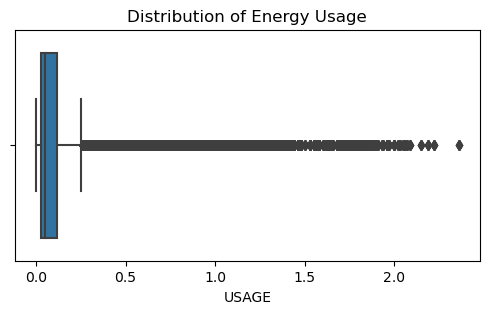

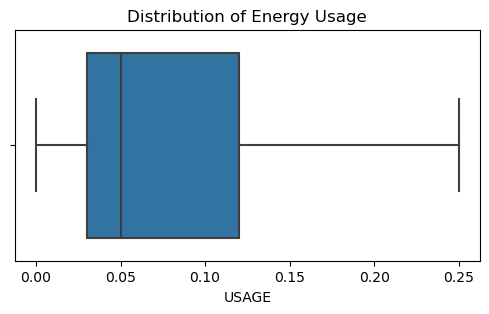

In [46]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='USAGE', data=data)
plt.title('Distribution of Energy Usage')
plt.show()

#Plot removing outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='USAGE', data=data, showfliers = False)
plt.title('Distribution of Energy Usage')
plt.show()

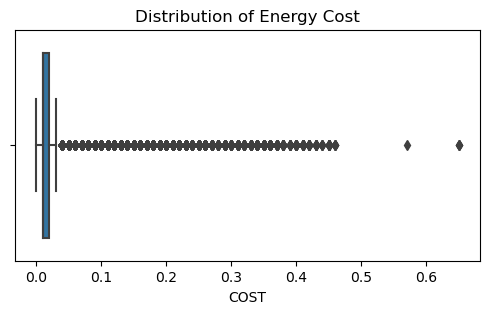

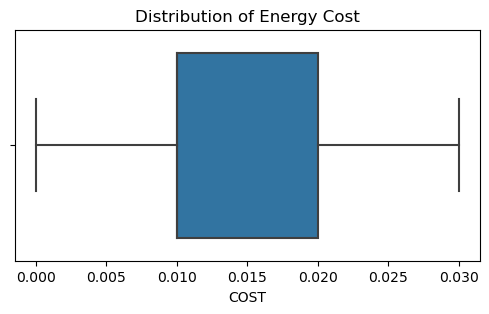

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='COST', data=data)
plt.title('Distribution of Energy Cost')
plt.show()

#Plot removing outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='COST', data=data, showfliers = False)
plt.title('Distribution of Energy Cost')
plt.show()

In [52]:
# data spliicing
X = data['USAGE'].values.reshape(-1,1)
y = data['COST'].values

In [53]:
# Split the data into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [54]:
#building the regression model
# Import and instantiate a regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
# fitting the data into the model
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(X_test)
y_pred

array([0.06642051, 0.01022968, 0.00420924, ..., 0.00621605, 0.00420924,
       0.03029784])

In [59]:
# Evaluate the model's performance using appropriate metrics (e.g., Mean Absolute Error,mean squared error, and r squared
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.0034642378394294944
Mean Squared Error: 2.901047841823016e-05
R-squared: 0.9838896294746279


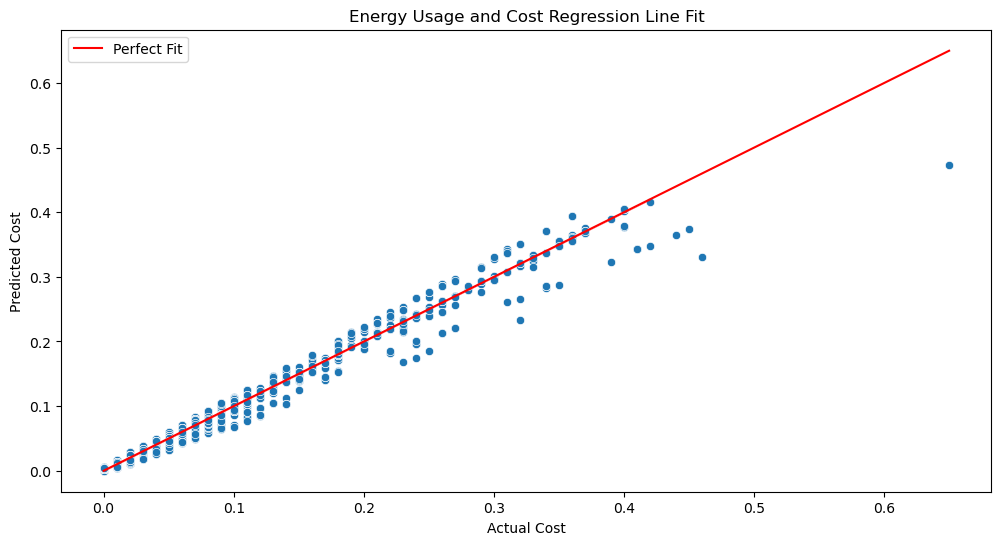

In [63]:
# Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit') # Regression line
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Energy Usage and Cost Regression Line Fit')
plt.legend()
plt.show()

this model has a project accuracy of approximately 98%